# Evaluated project 2

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from pathlib import Path
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# Read csv file and convert into dataframe
df= pd.read_csv("C:/Users/Admin/Downloads/avocado.csv/avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# number of rows and column
df.shape

(18249, 14)

In [4]:
# drop the Unnamed column from df

df = df.drop('Unnamed: 0', axis=1)

In [5]:
#getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
#checking null values
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [7]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df.Date.count()

18249

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


<AxesSubplot:>

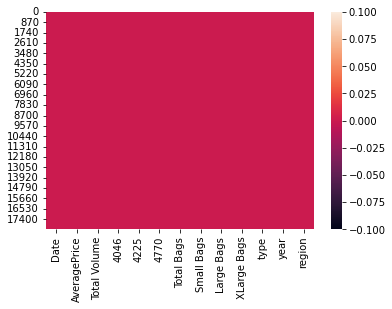

In [19]:
sns.heatmap(df.isnull())

In [20]:
# No Null values present in the data

In [21]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [22]:
#Date:
# Date - The date of the observation
df['Date'].nunique()

# 169 category out of 18249 records

169

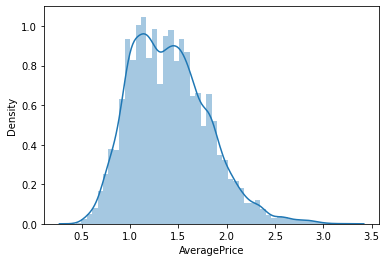

In [24]:
# Plotting the distplot for average price
sns.distplot(df['AveragePrice']);

In [25]:
# Average price feature have right skewed data and, 2 bumps near mean

<AxesSubplot:xlabel='Total Volume', ylabel='year'>

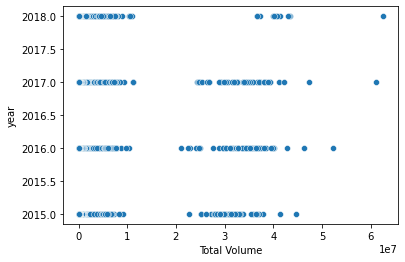

In [26]:
# Total Volume :   total number of avacado cold
sns.scatterplot('Total Volume','year',data=df)

In [27]:
# Year
df['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

In [28]:
# we have records of sales of Avacado in 2015-2018 year

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

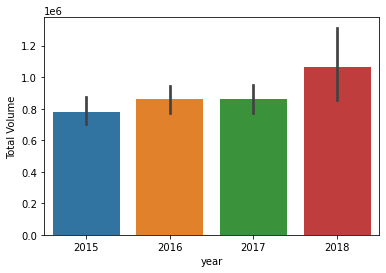

In [29]:
sns.barplot(y='Total Volume',x='year', data=df)

In [30]:
df.groupby('year')['Total Volume'].sum()

year
2015    4.385469e+09
2016    4.820890e+09
2017    4.934306e+09
2018    1.382738e+09
Name: Total Volume, dtype: float64

In [31]:
# Total avacado sales increases by year.

In [32]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [33]:
# Average price Exploration

In [34]:
df['AveragePrice'].nunique()

259

In [35]:
# we have 3 varity of avacade,  Product Lookup Code  PLU
# 4046 , 4225 , 4770

In [36]:
# Find Average price by type of avacado

df.groupby('type')['AveragePrice'].mean()


type
conventional    1.158040
organic         1.653999
Name: AveragePrice, dtype: float64

([<matplotlib.patches.Wedge at 0x184a75af340>,
 [Text(0.300862058141864, 1.0580557745084338, 'conventional'),
  Text(-0.30086215720419374, -1.0580557463396905, 'organic')],
 [Text(0.16410657716828944, 0.5771213315500547, '41.18%'),
  Text(-0.1641066312022875, -0.5771213161852856, '58.82%')])

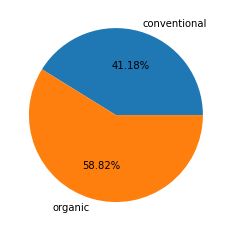

In [37]:
plt.pie( df.groupby('type')['AveragePrice'].mean().values, labels= df.groupby('type')['AveragePrice'].mean().index, autopct='%1.2f%%'  )

In [38]:
# Which type sold more, if price have any impact on sold

df.groupby('type')['Total Volume'].sum()


type
conventional    1.508722e+10
organic         4.361817e+08
Name: Total Volume, dtype: float64

In [39]:
df['type'].unique()


array(['conventional', 'organic'], dtype=object)

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

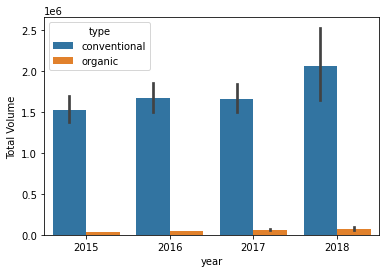

In [40]:
# Total sale by year by type
sns.barplot(y='Total Volume',x='year',hue='type', data=df)


In [41]:
# Sales of avacado increased by year


In [42]:
# Which type sold in which area

df['region'].nunique()

54

In [43]:
df.groupby(['region','type'])['AveragePrice'].mean().head(60)

region               type        
Albany               conventional    1.348757
                     organic         1.773314
Atlanta              conventional    1.068817
                     organic         1.607101
BaltimoreWashington  conventional    1.344201
                     organic         1.724260
Boise                conventional    1.076036
                     organic         1.620237
Boston               conventional    1.304379
                     organic         1.757396
BuffaloRochester     conventional    1.382308
                     organic         1.651361
California           conventional    1.105444
                     organic         1.685207
Charlotte            conventional    1.275089
                     organic         1.936982
Chicago              conventional    1.369349
                     organic         1.744201
CincinnatiDayton     conventional    1.015503
                     organic         1.402899
Columbus             conventional    1.066272


In [44]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

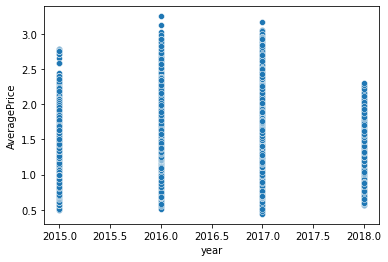

In [45]:
sns.scatterplot('year','AveragePrice', data=df)

In [46]:
df.groupby('year')['AveragePrice'].mean()

year
2015    1.375590
2016    1.338640
2017    1.515128
2018    1.347531
Name: AveragePrice, dtype: float64

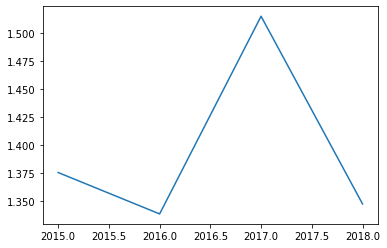

In [47]:
plt.plot(df.groupby('year')['AveragePrice'].mean().index, df.groupby('year')['AveragePrice'].mean().values  )


<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

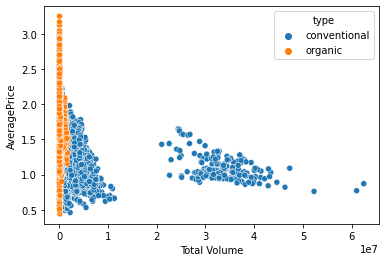

In [48]:
sns.scatterplot('Total Volume','AveragePrice',hue='type',data=df)

In [49]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


([<matplotlib.axis.YTick at 0x184a77c6790>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

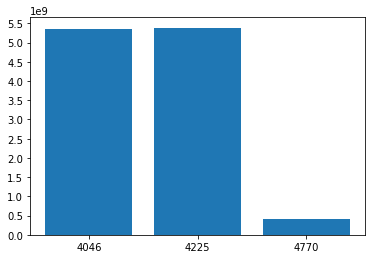

In [50]:
# Avacado category wise

plt.bar(  ['4046','4225','4770'],[df['4046'].sum(),df['4225'].sum(),df['4770'].sum()])
plt.yticks(range(1,6000000000,500000000))

In [51]:
df['4046'].sum()

5347110739.26

In [52]:
df['4225'].sum()

5386275717.93

In [53]:
df['4770'].sum()

416802342.12999994

In [54]:
# how much avacaddo sell per year

df.groupby('year')['type'].value_counts()

year  type        
2015  conventional    2808
      organic         2807
2016  conventional    2808
      organic         2808
2017  conventional    2862
      organic         2860
2018  conventional     648
      organic          648
Name: type, dtype: int64

In [55]:
df['Date'] = pd.to_datetime(df['Date'])

In [56]:
df['Date'].dt.month

0        12
1        12
2        12
3        12
4        11
         ..
18244     2
18245     1
18246     1
18247     1
18248     1
Name: Date, Length: 18249, dtype: int64

In [57]:
df['Month']=df['Date'].dt.month

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

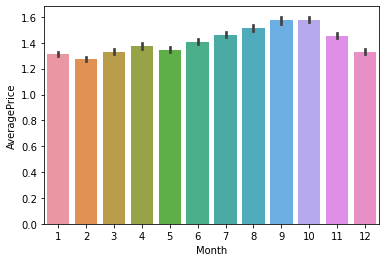

In [58]:
sns.barplot('Month','AveragePrice',data=df)

In [59]:
df.groupby('Month')['AveragePrice'].mean().sort_values()


Month
2     1.274387
1     1.311019
12    1.331112
3     1.332255
5     1.346601
4     1.374380
6     1.408964
11    1.455563
7     1.462077
8     1.512514
9     1.572654
10    1.579683
Name: AveragePrice, dtype: float64

<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

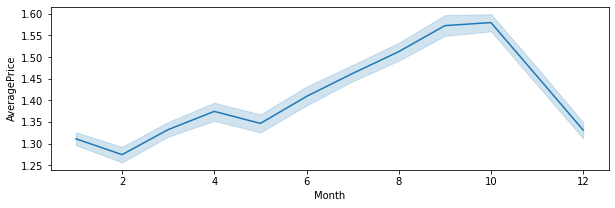

In [60]:
plt.figure(figsize=(10,3))
sns.lineplot('Month','AveragePrice',data=df)


<AxesSubplot:xlabel='Month', ylabel='AveragePrice'>

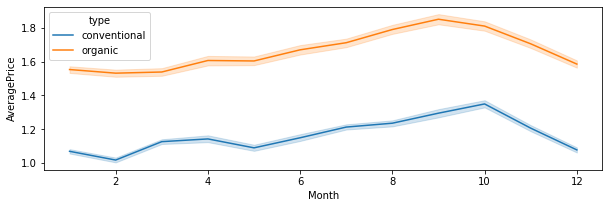

In [61]:
plt.figure(figsize=(10,3))
sns.lineplot('Month','AveragePrice',hue='type',data=df)

array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'Total Volume'}>],
       [<AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>,
        <AxesSubplot:title={'center':'4770'}>],
       [<AxesSubplot:title={'center':'Total Bags'}>,
        <AxesSubplot:title={'center':'Small Bags'}>,
        <AxesSubplot:title={'center':'Large Bags'}>],
       [<AxesSubplot:title={'center':'XLarge Bags'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

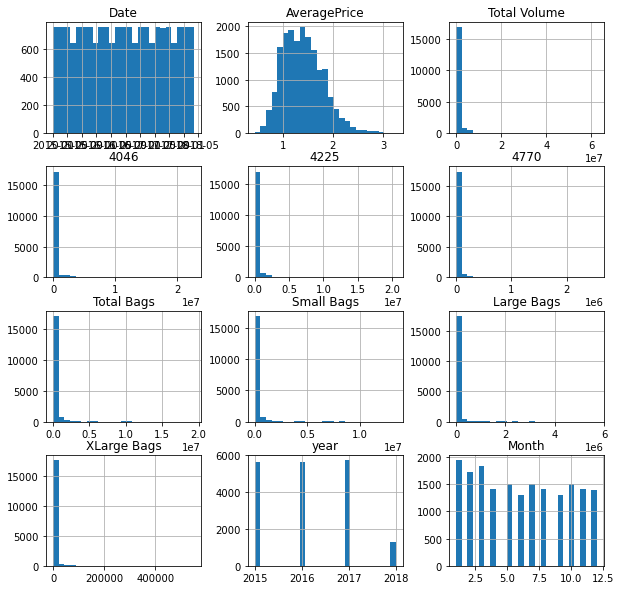

In [62]:
# Conclusion:  Price hike for both type of avacado during 8,9,10 months
# Jan-FEB-March  is the season for avacado, so price is comapritvely low
# in DEC, every one wants to clear stock for nre production , so price came down
df.hist(figsize=(10,10), bins=25)

In [63]:
# AveragePrice is almost normally distributed
# other columns are right skewed
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [64]:
# Total Bage are the sum of Small Bags + Large Bags + XLarge Bags

In [65]:
df['Total Bags'].sum()

4373175798.389999

In [66]:
df['Small Bags'].sum() + df['Large Bags'].sum() +df['XLarge Bags'].sum()

4373175785.39

In [67]:
#  correlation


df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000,-0.177050


In [68]:
correlation= list(df.columns)

In [69]:
correlation.pop(1)

'AveragePrice'

In [70]:
correlation.insert(14,'AveragePrice')

In [71]:
corr=df[correlation]

<AxesSubplot:>

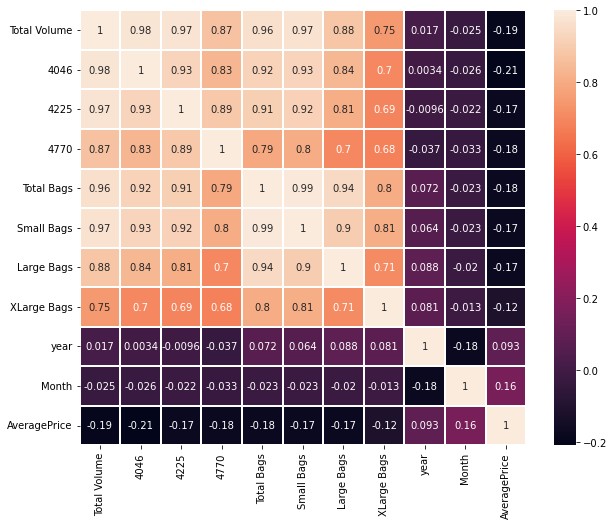

In [72]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.corr(), annot=True, linecolor='white',linewidths=.25)

In [73]:
#Target variable is Average Price
# correlation:  almost all features are negatively low correlated, 
# while year and month are positively low correlated
# much more independent features are highly correlated to each other, lets fine VIF
# Year is very low correlated with average price

In [74]:
# VIF to find multi colinearity
    
df.columns  

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [75]:
d=df.drop(['Date','type','region','AveragePrice','Total Bags','year'], axis=1)
d

,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,Month
0,64236.62,1036.74,54454.85,48.16,8603.62,93.25,0.0,12
1,54876.98,674.28,44638.81,58.33,9408.07,97.49,0.0,12
2,118220.22,794.70,109149.67,130.50,8042.21,103.14,0.0,12
3,78992.15,1132.00,71976.41,72.58,5677.40,133.76,0.0,12
4,51039.60,941.48,43838.39,75.78,5986.26,197.69,0.0,11
...,...,...,...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13066.82,431.85,0.0,2
18245,13888.04,1191.70,3431.50,0.00,8940.04,324.80,0.0,1
18246,13766.76,1191.92,2452.79,727.94,9351.80,42.31,0.0,1
18247,16205.22,1527.63,2981.04,727.01,10919.54,50.00,0.0,1


<AxesSubplot:>

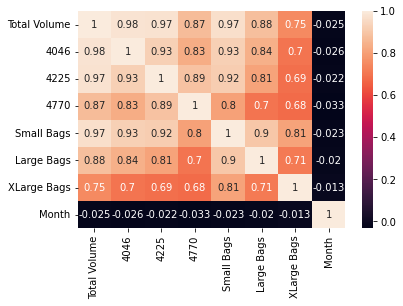

In [76]:
sns.heatmap(d.corr(),annot=True)


In [77]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
scaled= sc.fit_transform(d)

In [78]:
scaled

array([[-0.22771641, -0.23081597, -0.1999022 , ..., -0.22235202,
        -0.17557961,  1.64763162],
       [-0.23042664, -0.23110251, -0.20805446, ..., -0.22233464,
        -0.17557961,  1.64763162],
       [-0.21208462, -0.23100731, -0.1544779 , ..., -0.22231148,
        -0.17557961,  1.64763162],
       ...,
       [-0.24233073, -0.2306933 , -0.24309014, ..., -0.22256082,
        -0.17557961, -1.46495942],
       [-0.24162464, -0.2304279 , -0.24265143, ..., -0.2225293 ,
        -0.17557961, -1.46495942],
       [-0.24125273, -0.22934712, -0.24317042, ..., -0.22262764,
        -0.17557961, -1.46495942]])

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF= pd.DataFrame()
VIF['features']= d.columns

In [80]:
VIF['vif']= [variance_inflation_factor(d.values,i) for i in range(len(d.columns))]
VIF

,features,vif
0,Total Volume,5.202516e+09
1,4046,6.933785e+08
2,4225,6.320930e+08
3,4770,4.963920e+06
4,Small Bags,2.426346e+08
5,Large Bags,2.569115e+07
6,XLarge Bags,1.326561e+05
7,Month,1.044053e+00


In [81]:
df.head(5)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [82]:
# However some independent are highly correlated to each other but we cant drop those features because they provide different kind of information to predict average price
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Month'],
      dtype='object')

In [83]:
#outliers
num= df.select_dtypes(np.number)
num.skew()


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
Month            0.106617
dtype: float64

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
Month              AxesSubplot(0.125,0.321957;0.133621x0.16413)
dtype: object

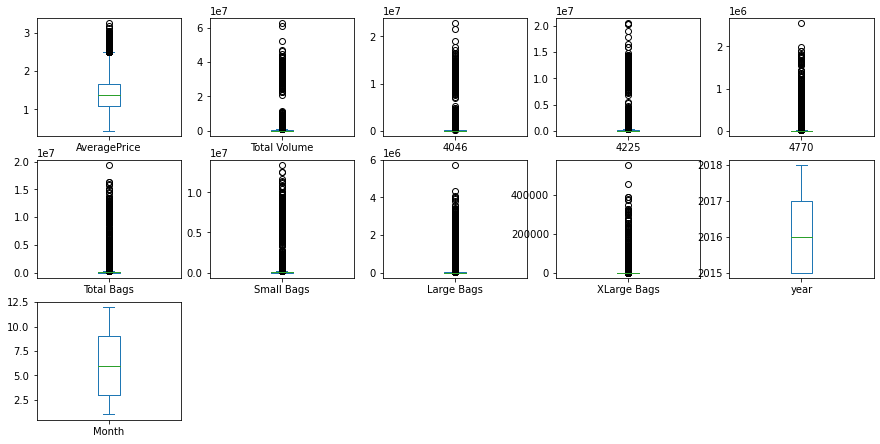

In [84]:
# data is skewed
df.plot(kind='box', subplots=True, layout=(4,5),figsize=(15,10))

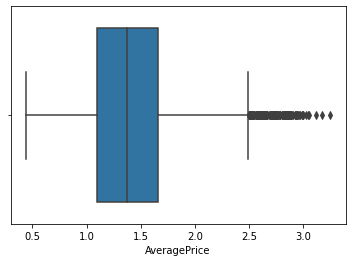

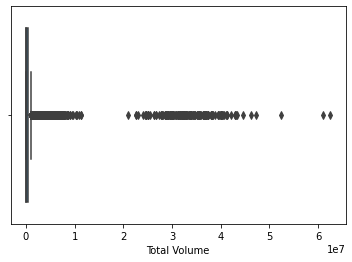

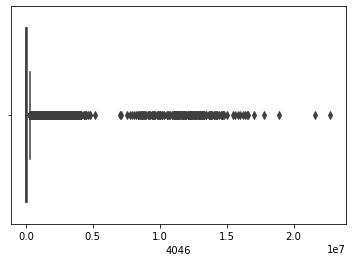

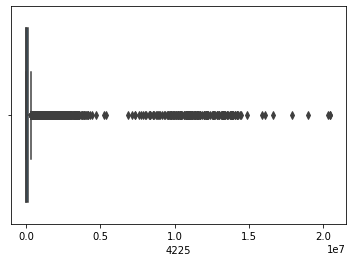

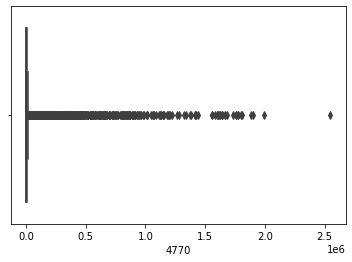

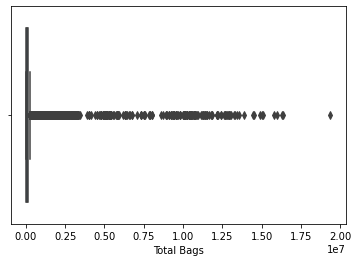

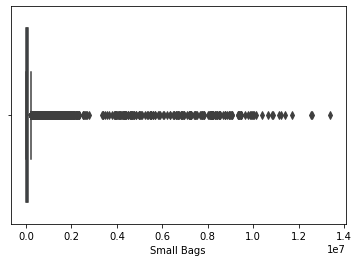

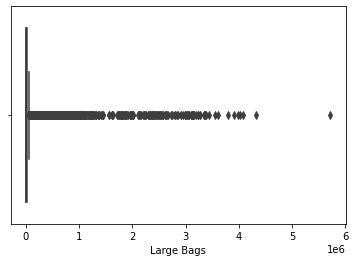

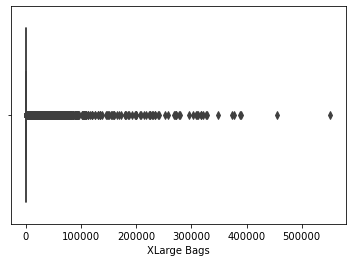

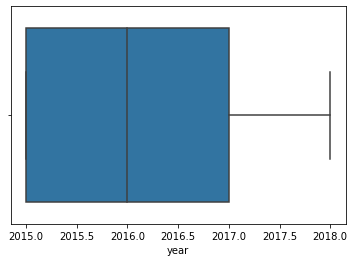

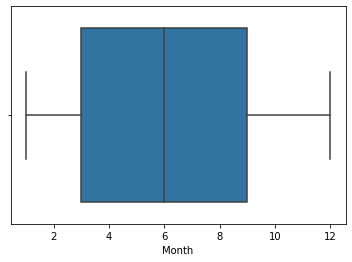

In [85]:
for i in num:
    sns.boxplot(df[i])
    plt.show()

In [86]:
# All columns have outliers except, year and month
#lets handle

In [87]:
from scipy.stats import zscore

# calculate z score
z=np.abs(zscore(num))
print(z)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.188689      0.227716  0.230816  0.199902  0.212091    0.234170   
1          0.139020      0.230427  0.231103  0.208054  0.211997    0.233350   
2          1.182069      0.212085  0.231007  0.154478  0.211325    0.234730   
3          0.809551      0.223444  0.230741  0.185350  0.211864    0.237096   
4          0.312861      0.231538  0.230891  0.208719  0.211834    0.236718   
...             ...           ...       ...       ...       ...         ...   
18244      0.556347      0.241373  0.230017  0.243857  0.212540    0.229301   
18245      0.755023      0.242296  0.230693  0.242277  0.212540    0.233594   
18246      1.152375      0.242331  0.230693  0.243090  0.205766    0.233463   
18247      1.301382      0.241625  0.230428  0.242651  0.205774    0.231866   
18248      0.531512      0.241253  0.229347  0.243170  0.210450    0.230807   

       Small Bags  Large Bags  XLarge Bags      yea

In [88]:
threshold=3
print(np.where(z<3))
print(num.shape)

(array([    0,     0,     0, ..., 18248, 18248, 18248], dtype=int64), array([ 0,  1,  2, ...,  8,  9, 10], dtype=int64))
(18249, 11)


In [92]:
# assign the value to df_new which are less the threshold
df1.shape


(18249, 5)

In [93]:
# Decide to remove ooutliers here.
df.shape[0]-df1.shape[0]

0

In [ ]:
# 467 records have been deleted as outliers
num_new=data.drop(['AveragePrice','Date','type','region'], axis=1)

In [ ]:
num_new.skew()